In [1]:
# Version 67
# From https://ungoogled-software.github.io/ungoogled-chromium-binaries/releases/linux_portable/64bit/
!wget -q https://github.com/Eloston/ungoogled-chromium-binaries/releases/download/67.0.3396.87-2/ungoogled-chromium_67.0.3396.87-2_linux.tar.xz
!tar -xf ungoogled-chromium_67.0.3396.87-2_linux.tar.xz

# From https://chromedriver.storage.googleapis.com/index.html
!wget -q https://chromedriver.storage.googleapis.com/2.41/chromedriver_linux64.zip
!unzip -o chromedriver_linux64.zip -d ./ungoogled-chromium_67.0.3396.87-1_linux

Archive:  chromedriver_linux64.zip
  inflating: ./ungoogled-chromium_67.0.3396.87-1_linux/chromedriver  


In [1]:
from selenium import webdriver
import os

def save_page(url,image):
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--disable-gpu')
    chrome_options.add_argument('--incognito')
    chrome_options.add_argument('log-level=3')
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument("--no-sandbox")
    chrome_driver = os.getcwd() +"/ungoogled-chromium_67.0.3396.87-1_linux/chromedriver"

    driver = webdriver.Chrome(options=chrome_options, executable_path=chrome_driver)
    #driver.set_page_load_timeout(6)
    #driver.set_script_timeout(6)
    driver.get(url)
    #time.sleep(0.5)
    driver.save_screenshot(image)
    driver.quit()
    
save_page('https://www.google.com','screenshot.png')

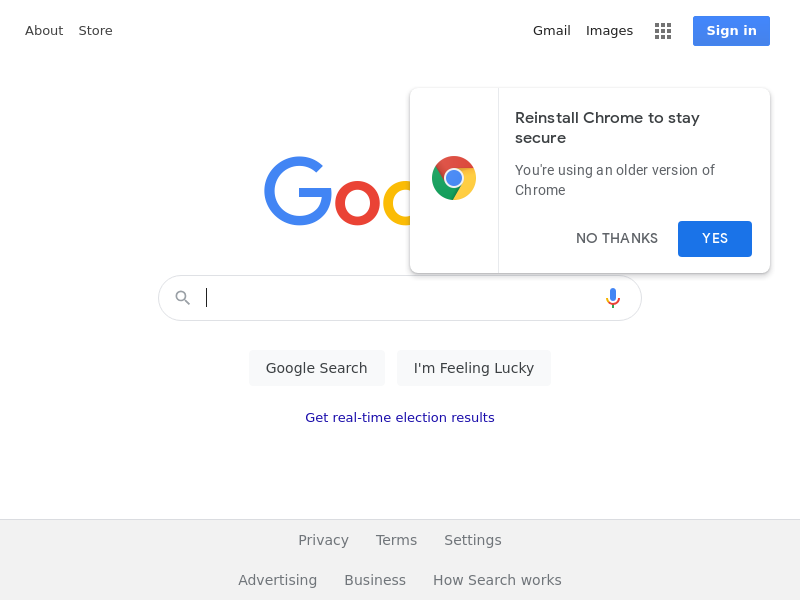

In [2]:
from IPython.display import Image
Image('screenshot.png')

In [58]:
import pandas as pd
data = pd.read_csv('./data/publicspaces/reviews.csv.zip')

In [92]:
import re
urllist = [
            "https://www.google.com/maps/place/Jurong+West+ActiveSG+Sports+Centre/@1.338618,103.6946925,18.42z/data=!4m5!3m4!1s0x31da0f9a82bb0513:0xd375d9c4ac268de2!8m2!3d1.3378059!4d103.6941925",
            "https://www.google.com/maps/place/Jurong+East+Stadium/@1.3467156,103.7277496,17z/data=!3m1!4b1!4m5!3m4!1s0x31da10200be7a159:0x75d21ac61f88fa7c!8m2!3d1.3467156!4d103.7299383",
            "https://www.google.com/maps/place/Choa+Chu+Kang+Stadium/@1.3908602,103.7461633,17z/data=!3m1!4b1!4m5!3m4!1s0x31da11eda54a42e7:0x6fac77031393e1ef!8m2!3d1.3908602!4d103.748352",
            "https://www.google.com/maps/place/Bukit+Gombak+ActiveSG+Stadium/@1.3582504,103.7514575,17z/data=!3m1!4b1!4m5!3m4!1s0x31da1049c57415eb:0x742bb0f3546ef1ee!8m2!3d1.3582504!4d103.7536462",
            "https://www.google.com/maps/place/Clementi+ActiveSG+Stadium/@1.310066,103.7603403,17z/data=!3m1!4b1!4m5!3m4!1s0x31da1a929eaa390f:0xe4728825937f8fe9!8m2!3d1.310066!4d103.762529",
            "https://www.google.com/maps/place/Woodlands+Stadium/@1.4345616,103.7786317,17z/data=!3m1!4b1!4m5!3m4!1s0x31da13abf9bdfadb:0xdffd7a332d0c82cb!8m2!3d1.4345616!4d103.7808204",
            "https://www.google.com/maps/place/Queenstown+ActiveSG+Stadium/@1.2958256,103.8002638,17z/data=!3m1!4b1!4m5!3m4!1s0x31da1a36e3ec3741:0xd07b93011ae7e79d!8m2!3d1.2958256!4d103.8024525",
            "https://www.google.com/maps/place/Yishun+ActiveSG+Gym/@1.4125194,103.8320718,18.08z/data=!4m5!3m4!1s0x31da140f96d55b17:0x6a593b7a0e432452!8m2!3d1.4119003!4d103.831458",
            "https://www.google.com/maps/place/MOE+PESEB+Stadium/@1.3192434,103.818742,18.33z/data=!4m12!1m6!3m5!1s0x31da1b6aa6ce81d7:0x93fbca1a125500c6!2sMOE+(Evans)+ActiveSG+Sports+Hall!8m2!3d1.3185662!4d103.8186802!3m4!1s0x31da1a0243930f31:0x486e39c5f442fe43!8m2!3d1.3204513!4d103.8198747",
            "https://www.google.com/maps/place/Yio+Chu+Kang+Stadium/@1.3827108,103.8443952,17z/data=!3m1!4b1!4m5!3m4!1s0x31da169536b07b77:0x85eb5a5a4eebcf43!8m2!3d1.3827108!4d103.8465839",
            "https://www.google.com/maps/place/Bishan+ActiveSG+Stadium/@1.354443,103.849372,17z/data=!3m1!4b1!4m5!3m4!1s0x31da171a03d01de7:0xbb755c74a1ad011d!8m2!3d1.354443!4d103.8515607",
            "https://www.google.com/maps/place/Toa+Payoh+Stadium/@1.3300749,103.8486591,17.83z/data=!4m14!1m8!3m7!1s0x31da171a03d01de7:0xbb755c74a1ad011d!2sBishan+ActiveSG+Stadium!8m2!3d1.354443!4d103.8515607!9m1!1b1!3m4!1s0x0:0x8395710bc1e7bd06!8m2!3d1.3303138!4d103.8529678",
            "https://www.google.com/maps/place/Serangoon+Stadium/@1.3559496,103.8726987,17z/data=!3m1!4b1!4m5!3m4!1s0x31da17af239b223b:0xfaefaa3bb638cd0c!8m2!3d1.3559496!4d103.8748874",
            "https://www.google.com/maps/place/Kallang+Practice+Track+(Home+of+Athletics)/@1.3047527,103.8759556,17z/data=!4m14!1m8!3m7!1s0x31da18488bb08bd1:0x79a48f44785f30ac!2sHome+of+Athletics!8m2!3d1.3047527!4d103.8781443!9m1!1b1!3m4!1s0x0:0x9dc88ec9f768c6a6!8m2!3d1.3056453!4d103.8776475",
            "https://www.google.com/maps/place/Hougang+ActiveSG+Stadium/@1.3695642,103.8849254,17z/data=!3m1!4b1!4m5!3m4!1s0x31da164914e9bdd9:0x6225f55570921fa7!8m2!3d1.3695642!4d103.8871141",
            "https://www.google.com/maps/place/Bedok+ActiveSG+Stadium/@1.3261,103.9366753,17z/data=!3m1!4b1!4m5!3m4!1s0x31da3d354b1da6d5:0x82dcd664c0da2208!8m2!3d1.3261!4d103.938864",
            "https://www.google.com/maps/place/The+Lawn+@+Marina+Bay/@1.281153,103.8537271,18.17z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da190fe4885561:0x9ccb86e92ba9592e!8m2!3d1.2803163!4d103.8533527",
            "https://www.google.com/maps/place/The+Promontory+-+Singapore/@1.2815869,103.8539431,19.58z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da190fc2e7b653:0x2429e613e9fc31ca!8m2!3d1.2816571!4d103.8540635",
            "https://www.google.com/maps/place/Clifford+Square/@1.2829093,103.8537431,18z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x0:0x6323e148ab43e6df!8m2!3d1.2844164!4d103.8535529",
            "https://www.google.com/maps/place/Esplanade+Outdoor+Theatre/@1.2883256,103.8556867,19.42z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da1908021ff963:0xee25c2edfcff2375!8m2!3d1.2889495!4d103.8560443",
            "https://www.google.com/maps/place/Youth+Olympic+Park/@1.2881479,103.8601317,18.83z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da19a9d92edab3:0xc924754ffbb5ad0a!8m2!3d1.2890145!4d103.860417",
            "https://www.google.com/maps/place/Helix+Bridge/@1.2876834,103.8584087,17z/data=!4m12!1m6!3m5!1s0x31da19071707804f:0xe96cc4b454cf960c!2sHelix+Bridge!8m2!3d1.2876834!4d103.8605974!3m4!1s0x31da19071707804f:0xe96cc4b454cf960c!8m2!3d1.2876834!4d103.8605974",
            "https://www.google.com/maps/place/Merlion+Park/@1.2864026,103.8544913,20.25z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da190ed6203605:0x66ad5eee6e01f3a7!8m2!3d1.2866944!4d103.8543183",
            "https://www.google.com/maps/place/The+Float+@+Marina+Bay/@1.2882822,103.8586448,19.42z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da19a82df5627f:0x1ff2e3f6296b5da!8m2!3d1.2881531!4d103.8590283",
]
df = []
for url in urllist:
    df.append(pd.DataFrame(str.split(re.sub(r'.*place\/([\d\w+@()-]*)\/.*\!3d([\d.]*)\!4d([\d.]*)',r'\1;\2;\3',url).replace('+',' '),';')).T)

In [93]:
location = pd.concat(df)
location.columns = ['location','lat','lng']
location

,location,lat,lng
0,Jurong West ActiveSG Sports Centre,1.3378059,103.6941925
0,Jurong East Stadium,1.3467156,103.7299383
0,Choa Chu Kang Stadium,1.3908602,103.748352
0,Bukit Gombak ActiveSG Stadium,1.3582504,103.7536462
0,Clementi ActiveSG Stadium,1.310066,103.762529
0,Woodlands Stadium,1.4345616,103.7808204
0,Queenstown ActiveSG Stadium,1.2958256,103.8024525
0,Yishun ActiveSG Gym,1.4119003,103.831458
0,MOE PESEB Stadium,1.3204513,103.8198747
0,Yio Chu Kang Stadium,1.3827108,103.8465839


In [94]:
table = data.drop(['lat','lng'],axis=1).merge(location,on='location',how='left')
table.loc[table.lat.isna(),'location'].unique()

array([], dtype=object)

In [95]:
table.to_csv('./data/publicspaces/reviews.csv.zip',index=False)

In [1]:
# Adapted from https://towardsdatascience.com/scraping-google-maps-reviews-in-python-2b153c655fc2

In [1]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import re
import logging
import traceback
import csv
import os
import pandas as pd

HEADER = ['id_review', 'caption', 'relative_date', 'retrieval_date', 'rating', 'username', 'n_review_user', 'n_photo_user', 'url_user']
HEADER_W_SOURCE = ['id_review', 'caption', 'relative_date','retrieval_date', 'rating', 'username', 'n_review_user', 'n_photo_user', 'url_user', 'url_source']
CHROME_DRIVER = os.getcwd() +"/ungoogled-chromium_67.0.3396.87-1_linux/chromedriver"
MAX_WAIT = 10
MAX_RETRY = 5
MAX_SCROLLS = 40

def csv_writer(source_field=True, path='data/', outfile='gm_reviews.csv'):
    targetfile = open(path + outfile, mode='w', encoding='utf-8', newline='\n')
    writer = csv.writer(targetfile, quoting=csv.QUOTE_MINIMAL)
    if source_field:
        h = HEADER_W_SOURCE
    else:
        h = HEADER
    writer.writerow(h)
    return writer

class GoogleMapsScraper:

    def __init__(self, debug=False):
        self.debug = debug
        self.driver = self.__get_driver()
        self.logger = self.__get_logger()

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_value, tb):
        if exc_type is not None:
            traceback.print_exception(exc_type, exc_value, tb)

        self.driver.close()
        self.driver.quit()

        return True

    def sort_by_date(self, url):
        self.driver.get(url)
        wait = WebDriverWait(self.driver, MAX_WAIT)

        # open dropdown menu
        clicked = False
        tries = 0
        while not clicked and tries < MAX_RETRY:
            try:
                #if not self.debug:
                #    menu_bt = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'div.cYrDcjyGO77__container')))
                #else:
                menu_bt = wait.until(EC.element_to_be_clickable((By.XPATH, '//button[@data-value=\'Sort\']')))
                menu_bt.click()

                clicked = True
                time.sleep(3)
            except Exception as e:
                tries += 1
                self.logger.warn('Failed to click recent button')

            # failed to open the dropdown
            if tries == MAX_RETRY:
                return -1

        # second element of the list: most recent
        recent_rating_bt = self.driver.find_elements_by_xpath('//li[@role=\'menuitemradio\']')[1]
        recent_rating_bt.click()

        # wait to load review (ajax call)
        time.sleep(5)

        return 0

    def get_reviews(self, offset):

        # scroll to load reviews
        self.__scroll()

        # wait for other reviews to load (ajax)
        time.sleep(4)

        # expand review text
        self.__expand_reviews()

        # parse reviews
        response = BeautifulSoup(self.driver.page_source, 'html.parser')
        rblock = response.find_all('div', class_='section-review-content')
        
        parsed_reviews = []
        for index, review in enumerate(rblock):
            if index >= offset:
                parsed_reviews.append(self.__parse(review))

        return parsed_reviews


    def get_account(self, url):

        self.driver.get(url)

        # ajax call also for this section
        time.sleep(4)

        resp = BeautifulSoup(self.driver.page_source, 'html.parser')

        place_data = self.__parse_place(resp)

        return place_data


    def __parse(self, review):

        item = {}

        id_review = review.find('button', class_='section-review-action-menu')['data-review-id']
        username = review.find('div', class_='section-review-title').find('span').text

        try:
            review_text = self.__filter_string(review.find('span', class_='section-review-text').text)
        except Exception as e:
            review_text = None

        rating = float(review.find('span', class_='section-review-stars')['aria-label'].split(' ')[1])
        relative_date = review.find('span', class_='section-review-publish-date').text

        #div.section-layout:nth-child(8)
        try:
            n_reviews_photos = review.find('div', class_='section-review-subtitle').find_all('span')[1].text
            metadata = n_reviews_photos.split('\xe3\x83\xbb')
            if len(metadata) == 3:
                n_photos = int(metadata[2].split(' ')[0].replace('.', ''))
            else:
                n_photos = 0

            idx = len(metadata)
            n_reviews = int(metadata[idx - 1].split(' ')[0].replace('.', ''))

        except Exception as e:
            n_reviews = 0
            n_photos = 0

        user_url = review.find('a')['href']

        item['id_review'] = id_review
        item['caption'] = review_text

        # depends on language, which depends on geolocation defined by Google Maps
        # custom mapping to transform into date shuold be implemented
        item['relative_date'] = relative_date

        # store datetime of scraping and apply further processing to calculate
        # correct date as retrieval_date - time(relative_date)
        item['retrieval_date'] = datetime.now()
        item['rating'] = rating
        item['username'] = username
        item['n_review_user'] = n_reviews
        item['n_photo_user'] = n_photos
        item['url_user'] = user_url

        return item


    def __parse_place(self, response):

        place = {}
        try:
            place['overall_rating'] = float(response.find('div', class_='gm2-display-2').text.replace(',', '.'))
        except:
            place['overall_rating'] = 'NOT FOUND'

        try:
            place['n_reviews'] = int(response.find('button', class_='gm2-caption').text.replace('.', '').replace(',','').split(' ')[0])
        except:
            place['n_reviews'] = 0

        try:
            tags = []
            for t in response.find_all('button', class_='section-input-chip-button'):
                tags.append(t.text) #.find_all('span')[0]
            place['tags'] = ','.join(tags)
        except:
            place['tags'] = ''
            
        return place

    # expand review description
    def __expand_reviews(self):
        # use XPath to load complete reviews
        links = self.driver.find_elements_by_xpath('//button[@class=\'section-expand-review blue-link\']')
        for l in links:
            l.click()
        time.sleep(2)


    def __scroll(self):
        scrollable_div = self.driver.find_element_by_css_selector('div.section-layout.section-scrollbox.scrollable-y.scrollable-show')
        self.driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', scrollable_div)


    def __get_logger(self):
        # create logger
        logger = logging.getLogger('googlemaps-scraper')
        logger.setLevel(logging.DEBUG)

        # create console handler and set level to debug
        fh = logging.FileHandler('gm-scraper.log')
        fh.setLevel(logging.DEBUG)

        # create formatter
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

        # add formatter to ch
        fh.setFormatter(formatter)

        # add ch to logger
        logger.addHandler(fh)

        return logger


    def __get_driver(self, debug=False):
        options = Options()

        if not self.debug:
            options.add_argument("--headless")
        else:
            options.add_argument("--window-size=1366,768")
           
        options.add_argument("--disable-notifications")
        options.add_argument('--disable-gpu')
        options.add_argument("--disable-dev-shm-usage")
        options.add_argument("--no-sandbox")

        input_driver = webdriver.Chrome(options=options, executable_path=CHROME_DRIVER)

        return input_driver


    # util function to clean special characters
    def __filter_string(self, str):
        strOut = str.replace('\r', ' ').replace('\n', ' ').replace('\t', ' ')
        return strOut

In [ ]:
%%time
urllist = [
            "https://www.google.com/maps/place/Jurong+West+ActiveSG+Sports+Centre/@1.338618,103.6946925,18.42z/data=!4m5!3m4!1s0x31da0f9a82bb0513:0xd375d9c4ac268de2!8m2!3d1.3378059!4d103.6941925",
            "https://www.google.com/maps/place/Jurong+East+Stadium/@1.3467156,103.7277496,17z/data=!3m1!4b1!4m5!3m4!1s0x31da10200be7a159:0x75d21ac61f88fa7c!8m2!3d1.3467156!4d103.7299383",
            "https://www.google.com/maps/place/Choa+Chu+Kang+Stadium/@1.3908602,103.7461633,17z/data=!3m1!4b1!4m5!3m4!1s0x31da11eda54a42e7:0x6fac77031393e1ef!8m2!3d1.3908602!4d103.748352",
            "https://www.google.com/maps/place/Bukit+Gombak+ActiveSG+Stadium/@1.3582504,103.7514575,17z/data=!3m1!4b1!4m5!3m4!1s0x31da1049c57415eb:0x742bb0f3546ef1ee!8m2!3d1.3582504!4d103.7536462",
            "https://www.google.com/maps/place/Clementi+ActiveSG+Stadium/@1.310066,103.7603403,17z/data=!3m1!4b1!4m5!3m4!1s0x31da1a929eaa390f:0xe4728825937f8fe9!8m2!3d1.310066!4d103.762529",
            "https://www.google.com/maps/place/Woodlands+Stadium/@1.4345616,103.7786317,17z/data=!3m1!4b1!4m5!3m4!1s0x31da13abf9bdfadb:0xdffd7a332d0c82cb!8m2!3d1.4345616!4d103.7808204",
            "https://www.google.com/maps/place/Queenstown+ActiveSG+Stadium/@1.2958256,103.8002638,17z/data=!3m1!4b1!4m5!3m4!1s0x31da1a36e3ec3741:0xd07b93011ae7e79d!8m2!3d1.2958256!4d103.8024525",
            "https://www.google.com/maps/place/Yishun+ActiveSG+Gym/@1.4125194,103.8320718,18.08z/data=!4m5!3m4!1s0x31da140f96d55b17:0x6a593b7a0e432452!8m2!3d1.4119003!4d103.831458",
            "https://www.google.com/maps/place/MOE+PESEB+Stadium/@1.3192434,103.818742,18.33z/data=!4m12!1m6!3m5!1s0x31da1b6aa6ce81d7:0x93fbca1a125500c6!2sMOE+(Evans)+ActiveSG+Sports+Hall!8m2!3d1.3185662!4d103.8186802!3m4!1s0x31da1a0243930f31:0x486e39c5f442fe43!8m2!3d1.3204513!4d103.8198747",
            "https://www.google.com/maps/place/Yio+Chu+Kang+Stadium/@1.3827108,103.8443952,17z/data=!3m1!4b1!4m5!3m4!1s0x31da169536b07b77:0x85eb5a5a4eebcf43!8m2!3d1.3827108!4d103.8465839",
            "https://www.google.com/maps/place/Bishan+ActiveSG+Stadium/@1.354443,103.849372,17z/data=!3m1!4b1!4m5!3m4!1s0x31da171a03d01de7:0xbb755c74a1ad011d!8m2!3d1.354443!4d103.8515607",
            "https://www.google.com/maps/place/Toa+Payoh+Stadium/@1.3300749,103.8486591,17.83z/data=!4m14!1m8!3m7!1s0x31da171a03d01de7:0xbb755c74a1ad011d!2sBishan+ActiveSG+Stadium!8m2!3d1.354443!4d103.8515607!9m1!1b1!3m4!1s0x0:0x8395710bc1e7bd06!8m2!3d1.3303138!4d103.8529678",
            "https://www.google.com/maps/place/Serangoon+Stadium/@1.3559496,103.8726987,17z/data=!3m1!4b1!4m5!3m4!1s0x31da17af239b223b:0xfaefaa3bb638cd0c!8m2!3d1.3559496!4d103.8748874",
            "https://www.google.com/maps/place/Kallang+Practice+Track+(Home+of+Athletics)/@1.3047527,103.8759556,17z/data=!4m14!1m8!3m7!1s0x31da18488bb08bd1:0x79a48f44785f30ac!2sHome+of+Athletics!8m2!3d1.3047527!4d103.8781443!9m1!1b1!3m4!1s0x0:0x9dc88ec9f768c6a6!8m2!3d1.3056453!4d103.8776475",
            "https://www.google.com/maps/place/Hougang+ActiveSG+Stadium/@1.3695642,103.8849254,17z/data=!3m1!4b1!4m5!3m4!1s0x31da164914e9bdd9:0x6225f55570921fa7!8m2!3d1.3695642!4d103.8871141",
            "https://www.google.com/maps/place/Bedok+ActiveSG+Stadium/@1.3261,103.9366753,17z/data=!3m1!4b1!4m5!3m4!1s0x31da3d354b1da6d5:0x82dcd664c0da2208!8m2!3d1.3261!4d103.938864"
          ]
urllist = [
            "https://www.google.com/maps/place/The+Lawn+@+Marina+Bay/@1.281153,103.8537271,18.17z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da190fe4885561:0x9ccb86e92ba9592e!8m2!3d1.2803163!4d103.8533527",
            "https://www.google.com/maps/place/The+Promontory+-+Singapore/@1.2815869,103.8539431,19.58z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da190fc2e7b653:0x2429e613e9fc31ca!8m2!3d1.2816571!4d103.8540635",
            "https://www.google.com/maps/place/Clifford+Square/@1.2829093,103.8537431,18z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x0:0x6323e148ab43e6df!8m2!3d1.2844164!4d103.8535529",
            "https://www.google.com/maps/place/Esplanade+Outdoor+Theatre/@1.2883256,103.8556867,19.42z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da1908021ff963:0xee25c2edfcff2375!8m2!3d1.2889495!4d103.8560443",
            "https://www.google.com/maps/place/Youth+Olympic+Park/@1.2881479,103.8601317,18.83z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da19a9d92edab3:0xc924754ffbb5ad0a!8m2!3d1.2890145!4d103.860417",
            "https://www.google.com/maps/place/Helix+Bridge/@1.2879297,103.8598644,18.25z/data=!4m10!1m2!2m1!1sEvent+venue!3m6!1s0x0:0xe96cc4b454cf960c!8m2!3d1.2876833!4d103.8605974!9m1!1b1"
]
#             "https://www.google.com/maps/place/Merlion+Park/@1.2864026,103.8544913,20.25z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da190ed6203605:0x66ad5eee6e01f3a7!8m2!3d1.2866944!4d103.8543183",
#            "https://www.google.com/maps/place/The+Float+@+Marina+Bay/@1.2882822,103.8586448,19.42z/data=!4m8!1m2!2m1!1sEvent+venue!3m4!1s0x31da19a82df5627f:0x1ff2e3f6296b5da!8m2!3d1.2881531!4d103.8590283",

details = []
with GoogleMapsScraper(debug=False) as scraper:
    for url in urllist:
        getsummary = scraper.get_account(url)
        getsummary['url'] = "".join(re.findall('place\/([^\/]*)\/',url)).replace('+',' ')
        details.append(getsummary)

In [ ]:
pd.DataFrame(details)

In [ ]:
maxreviews = 100
source=True
writer = csv_writer(source_field=source, path='./', outfile='marinabay_reviews.csv')
details = []

with GoogleMapsScraper(debug=False) as scraper:
    for url in urllist:
        #print(scraper.get_account(url))
        getsummary = scraper.get_account(url)
        getsummary['location'] = "".join(re.findall('place\/([^\/]*)\/',url)).replace('+',' ')
        maxreviews = getsummary['n_reviews']
        details.append(getsummary)
        error = scraper.sort_by_date(url)
        if error == 0:

            n = 0
            while n < maxreviews:
                reviews = scraper.get_reviews(n)

                for r in reviews:
                    row_data = list(r.values())
                    if source:
                        row_data.append("".join(re.findall('place\/([^\/]*)\/',url)).replace('+',' '))
                    writer.writerow(row_data)

                n += len(reviews)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_review       183 non-null    object 
 1   caption         53 non-null     object 
 2   relative_date   183 non-null    object 
 3   retrieval_date  183 non-null    object 
 4   rating          183 non-null    float64
 5   username        183 non-null    object 
 6   n_review_user   183 non-null    int64  
 7   n_photo_user    183 non-null    int64  
 8   url_user        183 non-null    object 
 9   url_source      183 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.4+ KB


In [13]:
import pandas as pd
data = pd.read_csv('gm_reviews.csv')
data.loc[~data['caption'].isna(),'caption'].tolist()

['Lovely places ❤',
 'Loved the place. Looks really grand. Well maintained. Though wish they would repaint the distance metrics on the track',
 'The Uncle Penyet Fusion stall has served me with excellent services and nice food. I do enjoy very much there.',
 'I used to train my run here during my younger days. Back then bishan stadium was one of the best stadium in Singapore. Recently, went there for a job. Was not impressed with the running track. Totally run down. I think it need to be upgrade.',
 'Great food and ambience at Club July!',
 'The stadium loved by Massive Wisdom Group of companies.',
 'Great stadium with nearby pool and gym',
 'Really solid track at the stadium. A very appropriate place to carry out workouts such as jogging. Love the place',
 'Very nice place',
 'Clean facility, good for evening jog.',
 'Very new!',
 'Bishan stadium is good sport for kids & adult too can be running or can be use for school',
 'This stadium is a very tranquil place to jog in the evening.'